In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [3]:
doc = ["kalidasa was a phenomenal poet",
       "vijayanagara was a great empire"]

In [4]:
# Default token_pattern considers only words which have 2 or more alphanumerics as a token.
# Default token_pattern ignores single character words like I, a etc.
# Making token_pattern=r"(?u)\b\w+\b" will make words with 1 or more alphanumerics as a token

vect = CountVectorizer(stop_words=None, token_pattern=r"(?u)\b\w+\b")
X = vect.fit_transform(doc)

In [5]:
print("Set of unique words in the document is given by: \n{}".format(vect.get_feature_names()))

Set of unique words in the document is given by: 
['a', 'empire', 'great', 'kalidasa', 'phenomenal', 'poet', 'vijayanagara', 'was']


In [6]:
# Create a co-occurrence matrix of unique words and initialize them to zero
uniq_wrds = vect.get_feature_names()
n = len(uniq_wrds)
co_mat = np.zeros((n,n))
co_mat

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
window_len = 2
def update_co_mat(x):   
    # Get all the words in the sentence and store it in an array wrd_lst
    wrd_list = x.split(' ')
    
    # Consider each word as a focus word
    for focus_wrd_indx, focus_wrd in enumerate(wrd_list):
        focus_wrd = focus_wrd.lower()
        # Get the indices of all the context words for the given focus word
        for contxt_wrd_indx in range((max(0,focus_wrd_indx - window_len)),(min(len(wrd_list),focus_wrd_indx + window_len +1))):                        
            # If context words are in the unique words list
            if wrd_list[contxt_wrd_indx] in uniq_wrds:
                
                # To identify the row number, get the index of the focus_wrd in the uniq_wrds list
                co_mat_row_indx = uniq_wrds.index(focus_wrd)
                
                # To identify the column number, get the index of the context words in the uniq_wrds list
                co_mat_col_indx = uniq_wrds.index(wrd_list[contxt_wrd_indx])
                                
                # Update the respective columns of the corresponding focus word row
                co_mat[co_mat_row_indx][co_mat_col_indx] += 1

In [8]:
for sentence in doc:
    update_co_mat(sentence)
print()
print("Co-occurrence Matrix: ")
print(co_mat)


Co-occurrence Matrix: 
[[2. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1.]
 [2. 0. 1. 1. 1. 0. 1. 2.]]


Text(0.5, 1, 'Co-occurrence Matrix')

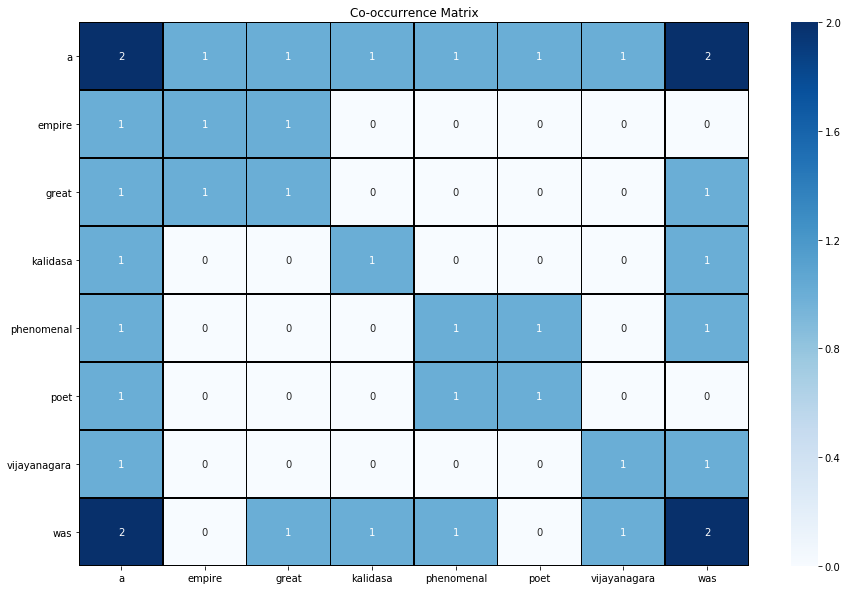

In [9]:
figure(figsize=(15,10))
df_cm1 = pd.DataFrame(co_mat, index=uniq_wrds, columns=uniq_wrds)
cf_hm1 = sns.heatmap(df_cm1, annot=True, xticklabels=uniq_wrds, yticklabels=uniq_wrds, linewidths=.5, linecolor='black', cmap="Blues")
plt.yticks(rotation=0)
plt.title('Co-occurrence Matrix')